In [1]:
#STANDARDISATION TECHNIQUE USING STANDARD SCALER

In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Age', ylabel='Count'>

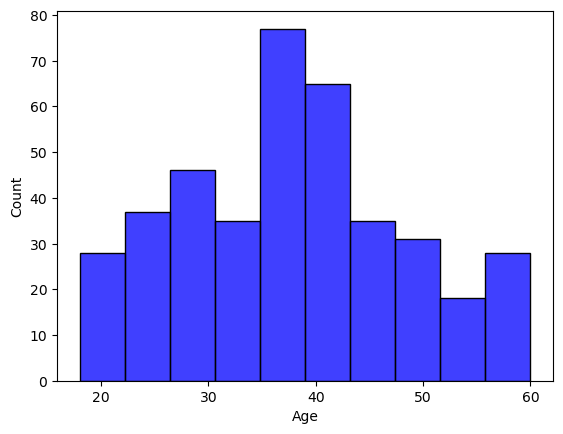

In [101]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

In [70]:
#all rows, but columns from index 2 
df=df.iloc[:,2:]
#user id gender ignored
#run this cell only once. if u execeute this particular cell indepedendtly more than once,
# df columns shall be reduced. if so, execute previous cells to restore.

In [71]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    df.drop('Purchased',axis=1),df['Purchased'],
            test_size=0.3,random_state=0)

In [72]:
# scaler
from sklearn.preprocessing import StandardScaler

scaler_object= StandardScaler()
scaler_object.fit(x_train)
print(scaler_object.mean_) # mean values of 2 columns age and salary
x_train_scaled=scaler_object.transform(x_train)
x_test_scaled= scaler_object.transform(x_test)

[3.78642857e+01 6.98071429e+04]


In [73]:
print(x_train.shape,x_test.shape)
type(x_train_scaled)

(280, 2) (120, 2)


numpy.ndarray

In [74]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
type(x_train_scaled)

pandas.core.frame.DataFrame

In [80]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


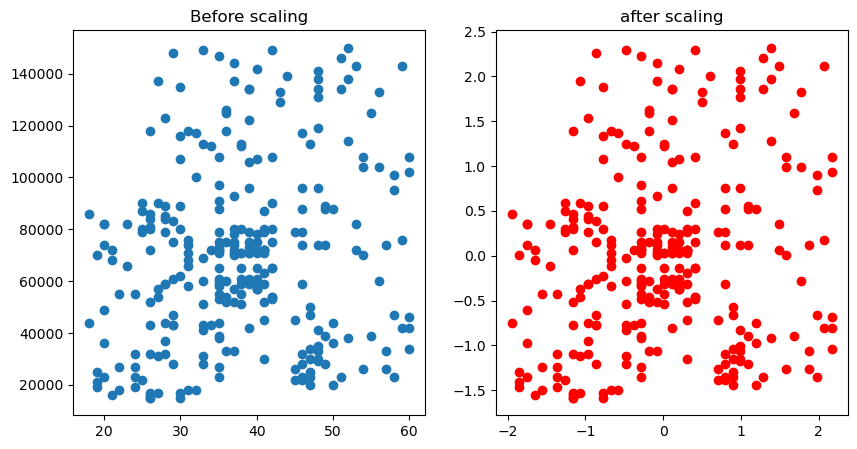

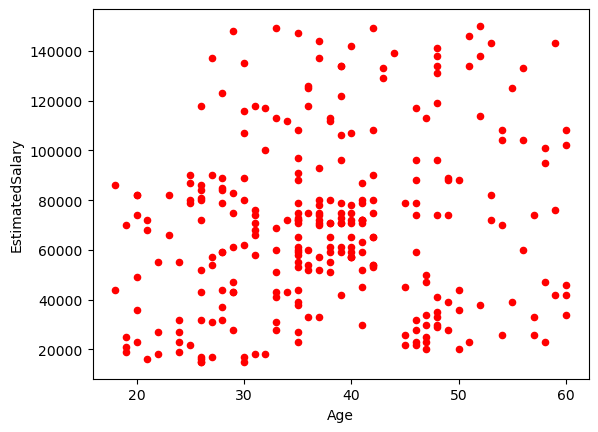

In [86]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0].scatter(x_train["Age"],x_train["EstimatedSalary"])
axes[0].set_title("Before scaling")
axes[1].scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],c="red")
axes[1].set_title("after scaling")
#one way to print scatter plot
#ax1=x_train.plot.scatter(x= "Age",y="EstimatedSalary",c="red")

<AxesSubplot: ylabel='Density'>

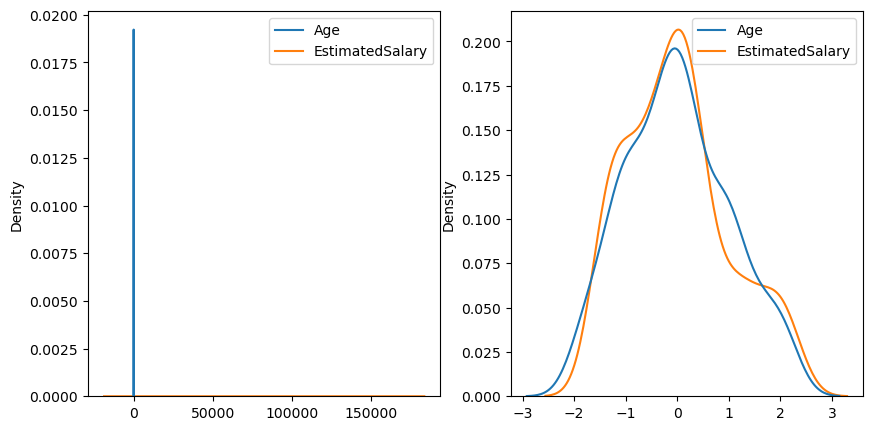

In [123]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(x_train,color="red",ax=axes[0])
sns.kdeplot(x_train_scaled,color="blue",ax=axes[1])
#sns.histplot(x_train_scaled,kde="True")

In [125]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr_scaled=LogisticRegression()
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)


In [126]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print("Actual accuracy score ",accuracy_score(y_test,y_pred))

print("Scaled accuracy score ",accuracy_score(y_test,y_pred_scaled))

Actual accuracy score  0.6583333333333333
Scaled accuracy score  0.8666666666666667


In [133]:
#if we use decision tree classifier instead of logistic regression
#output would'nt change despite scaling

dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

print("accuracy ",accuracy_score(y_test,y_pred))
print("accuracy after scaling ", accuracy_score(y_test,y_pred_scaled))

accuracy  0.875
accuracy after scaling  0.875
